## **1. Importing Libraries**

numpy: For numerical operations.

pandas: For data manipulation and analysis.

matplotlib.pyplot: For data visualization.

keras.models.load_model: For loading pre-trained Keras models.

datetime: For handling date and time.

yfinance: For downloading stock data from Yahoo Finance.

tensorflow: For building and training deep learning models.

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import load_model
import datetime as dt
import yfinance as yf
import tensorflow as tf

## **2. Downloading Stock Data**


STOCK: Ticker symbol of the stock (State Bank of India in this case).

start_date: Starting date for the stock data.

end_date: Ending date for the stock data.

yf.download: Downloads historical stock data from Yahoo Finance.

df.head(): Displays the first five rows of the DataFrame.

In [20]:
STOCK = 'SBIN.NS'
start_date = dt.date(2000,1,1)
end_date = dt.datetime.now().date()
df = yf.download(STOCK,start=start_date, end=end_date, progress=False)

# read DataSet
df.head()

Open       High        Low      Close  Adj Close    Volume
Date                                                                       
2000-01-03  22.267092  22.988886  22.101974  22.988886  15.844799  25152894
2000-01-04  22.988886  24.720245  22.535995  24.446625  16.849533  47648560
2000-01-05  23.493668  24.974997  23.116261  23.441774  16.156950  36396207
2000-01-06  23.776726  25.286358  23.776726  24.625893  16.973083  70573968
2000-01-07  24.673071  26.409147  24.059780  25.786425  17.772964  83453217

In [21]:
#  Dataset Analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6111 entries, 2000-01-03 to 2024-06-28
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6111 non-null   float64
 1   High       6111 non-null   float64
 2   Low        6111 non-null   float64
 3   Close      6111 non-null   float64
 4   Adj Close  6111 non-null   float64
 5   Volume     6111 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 334.2 KB


## **3. Calculating Moving Averages**

rolling(100).mean(): Calculates the 100-day moving average.

rolling(200).mean(): Calculates the 200-day moving average.

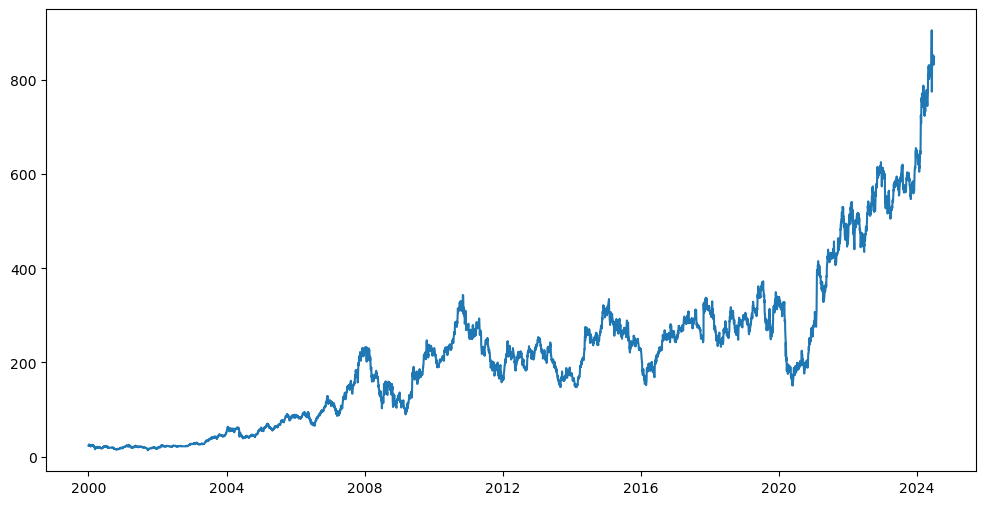

In [22]:
# Graph of Close Price history
fig=plt.figure(figsize=(12,6))
plt.plot(df.Close)

In [23]:
ma100 = df.Close.rolling(100).mean()
ma100

Date
2000-01-03         NaN
2000-01-04         NaN
2000-01-05         NaN
2000-01-06         NaN
2000-01-07         NaN
                ...   
2024-06-24    771.1490
2024-06-25    773.3885
2024-06-26    775.7145
2024-06-27    777.9250
2024-06-28    780.1470
Name: Close, Length: 6111, dtype: float64

In [24]:
ma200=df.Close.rolling(200).mean()
ma200

Date
2000-01-03           NaN
2000-01-04           NaN
2000-01-05           NaN
2000-01-06           NaN
2000-01-07           NaN
                 ...    
2024-06-24    683.687001
2024-06-25    685.034001
2024-06-26    686.386501
2024-06-27    687.769501
2024-06-28    689.207501
Name: Close, Length: 6111, dtype: float64

## **4. Plotting Stock Data and Moving Averages**

plt.plot(df.Close): Plots the closing prices of the stock.

plt.plot(ma100, 'r'): Plots the 100-day moving average in red.

plt.plot(ma200, 'g'): Plots the 200-day moving average in green.

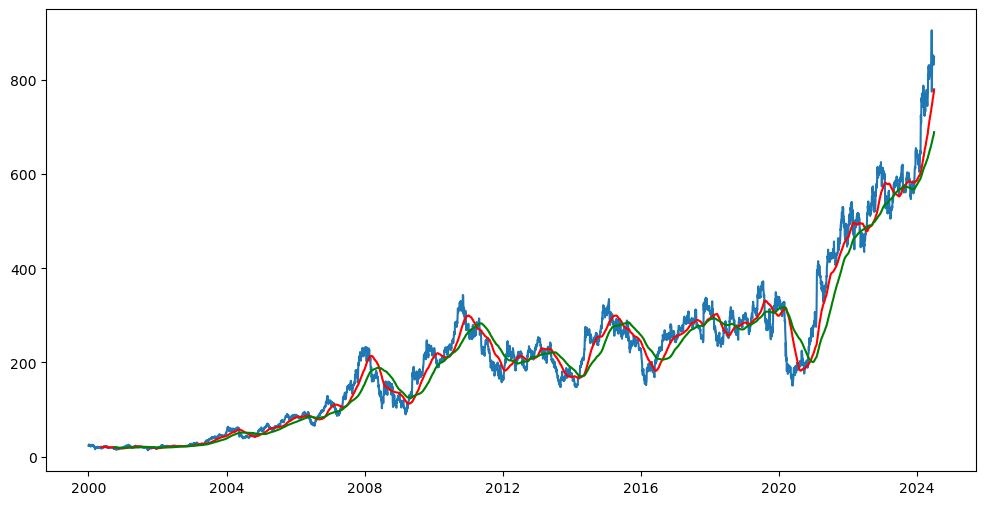

In [25]:
fig=plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [26]:
df.shape

(6111, 6)

## **5. Splitting Data into Training and Testing**

data_training: DataFrame containing 70% of the data for training.

data_testing: DataFrame containing the remaining 30% of the data for testing.

In [27]:
data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.70): int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(4277, 1)
(1834, 1)


## **6. Scaling Data**

MinMaxScaler: Scales data to a specified range (0 to 1 in this case).

fit_transform: Fits the scaler to the data and transforms it.

In [28]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [29]:
# Preprocessing
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.02922066],
       [0.03363806],
       [0.03059305],
       ...,
       [0.74243855],
       [0.74259003],
       [0.72031725]])

## **7. Creating Training Data**

x_train: List of sequences of 100 data points for each input sample.

y_train: List of corresponding labels for each input sample.

In [30]:
x_train = []
y_train = []
for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [31]:
x_train.shape

(4177, 100, 1)

## **8. Building the LSTM Model**

Sequential(): Initializes the sequential model.

LSTM(units=50, ...): Adds LSTM layers with specified units.

Dropout(0.2): Adds dropout layers to prevent overfitting.

Dense(units=1): Adds a dense layer with 1 unit.

model.summary(): Prints the model architecture.

In [32]:
# Model fitting of Long Short Term Memory architecture
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [33]:
model = Sequential()
model.add(LSTM(units = 50, activation= 'relu', return_sequences=True, input_shape = (x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units = 80, activation = 'relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [34]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

## **9. Compiling and Training the Model**

compile: Compiles the model with the Adam optimizer and mean squared error loss function.

fit: Trains the model on the training data for 50 epochs.

save: Saves the trained model to a file.

In [35]:
# Apply Training
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 30s 182ms/step - loss: 0.0576
Epoch 2/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 23s 175ms/step - loss: 0.0081
Epoch 3/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - loss: 0.0067
Epoch 4/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 22s 171ms/step - loss: 0.0057
Epoch 5/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 23s 172ms/step - loss: 0.0051
Epoch 6/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 23s 174ms/step - loss: 0.0055
Epoch 7/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - loss: 0.0041
Epoch 8/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - loss: 0.0048
Epoch 9/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - loss: 0.0041
Epoch 10/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - loss: 0.0037
Epoch 11/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - loss: 0.0038
Epoch 12/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 150ms/step - loss: 0.0035
Epoch 13/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - loss: 0.0033
Epoch 14/50
131/131 ━━━━━━━━━━━━━━━━━━━━ 20s 151ms/step - loss: 0.0034
Epoch 15/50
131

In [36]:
model.save('keras_model.h5')

## **10. Preparing Testing Data**

past_100_days: Last 100 days of the training data.

final_df: Concatenation of the last 100 days of training data and the testing data.

input_data: Scales the concatenated data.

In [37]:
data_testing.head()

Close
Date                  
2017-01-23  254.149994
2017-01-24  254.899994
2017-01-25  259.200012
2017-01-27  266.450012
2017-01-30  263.950012

In [38]:
data_training.tail(100)

Close
Date                  
2016-08-26  246.600006
2016-08-29  249.050003
2016-08-30  252.250000
2016-08-31  252.500000
2016-09-01  252.000000
...                ...
2017-01-16  255.750000
2017-01-17  256.000000
2017-01-18  258.350006
2017-01-19  258.399994
2017-01-20  251.050003

[100 rows x 1 columns]

In [39]:
past_100_days = data_training.tail(100)

In [40]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)

In [41]:
final_df.head()

Close
0  246.600006
1  249.050003
2  252.250000
3  252.500000
4  252.000000

In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.12685479],
       [0.13010068],
       [0.13434021],
       ...,
       [0.92011123],
       [0.9183227 ],
       [0.92488075]])

In [43]:
input_data.shape

(1934, 1)

## **11. Creating Testing Data**

x_test: List of sequences of 100 data points for each input sample.

y_test: List of corresponding labels for each input sample.

In [44]:
x_test = []
y_test = []
for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test, y_test = np.array(x_test), np.array(y_test)

print(x_test.shape)
print(y_test.shape)

(1834, 100, 1)
(1834,)


## **12. Making Predictions**

predict: Predicts the stock prices using the trained model.

In [45]:
y_predicted = model.predict(x_test)

58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 53ms/step


In [46]:
y_predicted.shape

(1834, 1)

In [47]:
y_predicted

array([[0.22682048],
       [0.22771865],
       [0.22828051],
       ...,
       [0.86302966],
       [0.8648549 ],
       [0.8673492 ]], dtype=float32)

In [48]:
y_test

array([0.13685743, 0.13785107, 0.14354796, ..., 0.92011123, 0.9183227 ,
       0.92488075])

## **13. Inversing Scaling and Plotting Predictions**

scale_factor: Factor used to inverse the scaling.

plt.plot: Plots the original and predicted prices.

plt.legend: Adds a legend to the plot.

plt.title: Adds a title to the plot.

plt.xlabel: Adds a label to the x-axis.

plt.ylabel: Adds a label to the y-axis.

plt.show(): Displays the plot.

In [49]:
scaler.scale_

array([0.00132485])

In [50]:
scale_factor = 1/0.00107175
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

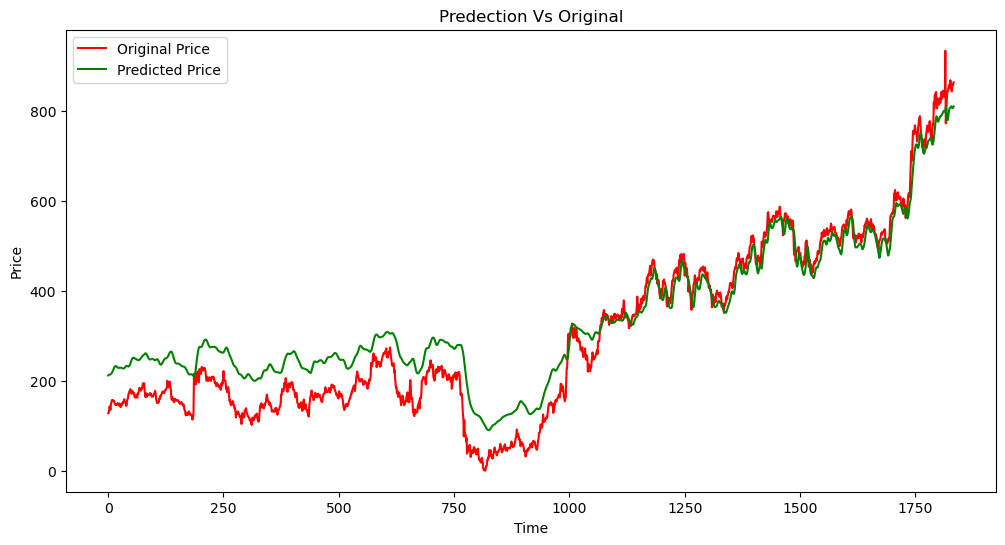

In [51]:
# Predicted Graph
plt.figure(figsize=(12,6))
plt.plot(y_test, 'r')
plt.plot(y_predicted, 'g')
plt.legend(['Original Price', 'Predicted Price'])
plt.title("Predection Vs Original")
plt.xlabel('Time')
plt.ylabel('Price')
plt.show()